In [191]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from itertools import combinations
import seaborn as sns

data = pd.read_csv('Book1.csv', index_col='dep')

display(data)

,taux_pers_age,medecins,taux_urba,taux_migration_interne,ephad,pop_2019,taux_pauvrete
dep,,,,,,,
01,17.7,433,67.0,0.0,6101,652432,10.7
02,20.2,378,53.2,0.1,5667,531345,18.4
03,27.4,293,58.3,1.3,5084,335975,15.4
04,26.1,175,61.9,2.3,2073,164308,16.6
05,24.4,201,59.5,1.7,1498,141220,13.9
...,...,...,...,...,...,...,...
91,15.1,835,96.1,-2.2,8332,1301659,13.3
92,15.2,1133,100.0,-2.4,10528,1624357,11.9
93,11.9,935,100.0,-1.7,6021,1644903,27.9


<AxesSubplot: >

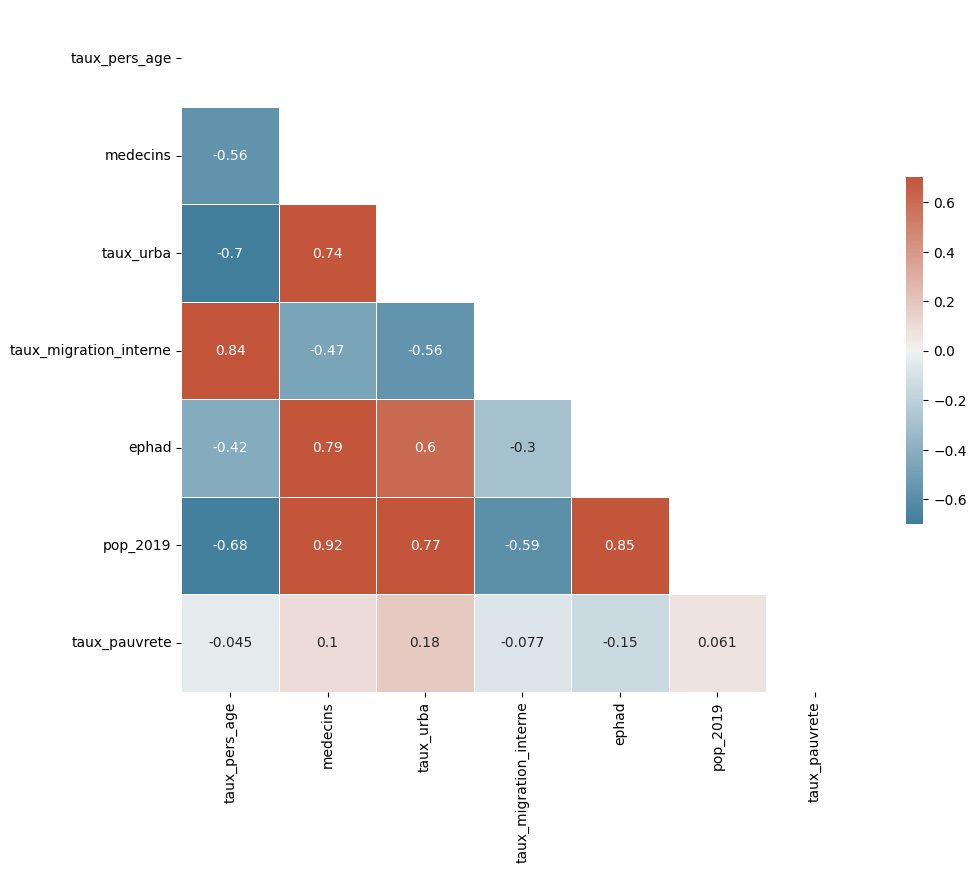

In [192]:
# Matrice de corrélation
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr , mask=mask, cmap=cmap, vmax=0.7, vmin=-0.7, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [193]:
def vif(variables):

    X = data[variables]

    vif = pd.DataFrame()
    vif['variable'] = X.columns

    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif = vif[vif['variable']!='contante']

    return vif

variables_exp = ['medecins','taux_migration_interne','taux_pauvrete']

vif(variables_exp).sort_values('VIF', ascending=False)

,variable,VIF
2,taux_pauvrete,3.146166
0,medecins,2.812983
1,taux_migration_interne,1.376738


In [194]:
reg = smf.ols(formula='taux_pers_age ~ taux_migration_interne + taux_pauvrete', data=data).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:          taux_pers_age   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           2.99e-25
Time:                        21:06:57   Log-Likelihood:                -208.94
No. Observations:                  96   AIC:                             423.9
Df Residuals:                      93   BIC:                             431.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 20